In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import astropy.io.fits as fits

In [2]:
filepath = './fits/Skyserver_Radial5_14_2018_10_48_26_PM.fits'

In [3]:
hdu = fits.open(filepath)

data = hdu[1].data.copy()
header = hdu[1].header.copy()

hdu.close()
header

XTENSION= 'BINTABLE'                                                            
BITPIX  =                    8                                                  
NAXIS   =                    2                                                  
NAXIS1  =                   75                                                  
NAXIS2  =                 2000                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
TFIELDS =                   19                                                  
TFORM1  = '1K'                                                                  
TTYPE1  = 'objid'                                                               
TTYPE2  = 'run'                                                                 
TFORM2  = '1I'                                                                  
TFORM3  = '1I'              

In [4]:
data

FITS_rec([(1237671262809227984, 6004, 301, 6, 116,  720, 3, 132.86906915, 12.23657133, 24.015852, 21.736088, 20.831251, 20.494165, 20.40777 , 1.2221495 , 0.09340573, 0.05995366, 0.06313583, 0.19971246),
          (1237671262809227568, 6004, 301, 6, 116,  304, 6, 132.86582148, 12.24144703, 19.855644, 18.28192 , 17.657976, 17.45334 , 17.30062 , 0.03529372, 0.00644702, 0.00553151, 0.00594571, 0.01197485),
          (1237671262809227567, 6004, 301, 6, 116,  303, 6, 132.86769188, 12.24020129, 24.168467, 22.524271, 22.068197, 22.093323, 22.542933, 0.7403593 , 0.11258978, 0.10746677, 0.14996918, 0.4961443 ),
          ...,
          (1237671125370471571, 5972, 301, 6, 119, 1171, 6, 133.05445779, 11.99426796, 24.134144, 24.039572, 24.106663, 23.615044, 20.956182, 0.7606497 , 0.37044463, 0.5334581 , 0.5651709 , 0.20973983),
          (1237671125370471572, 5972, 301, 6, 119, 1172, 6, 133.05831125, 11.99921347, 25.853628, 25.715328, 23.39942 , 22.049421, 20.69858 , 0.65380245, 0.64391255, 0.45197

In [5]:
plt.style.use('default')
plt.style.use('ggplot')

# Looks good. On to some C-M diagrams:

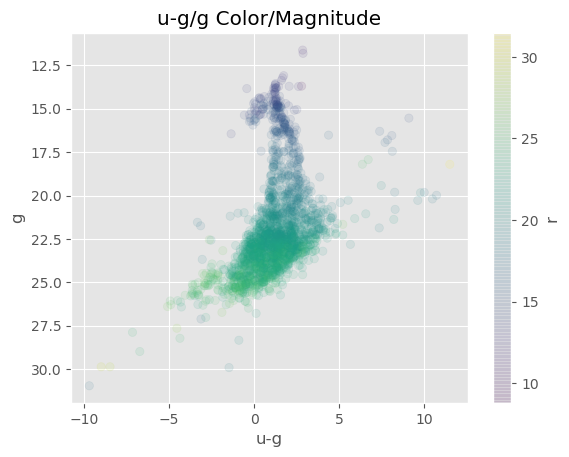

In [6]:
plt.scatter(data['u']-data['g'],data['g'],  c=data['r'], alpha=.1)
cb = plt.colorbar()
cb.set_label('r')
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('u-g')
plt.ylabel('g')
plt.title('u-g/g Color/Magnitude');

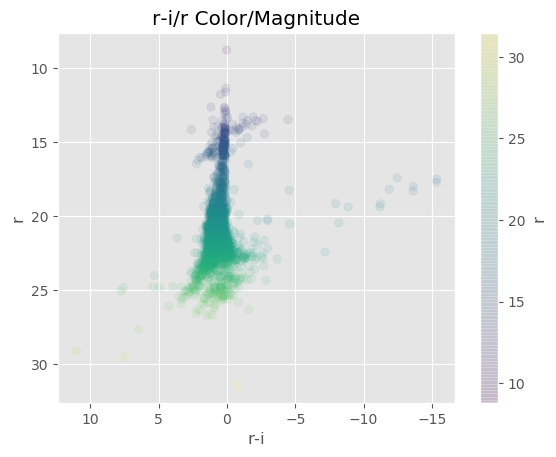

In [7]:
plt.scatter(data['r']-data['i'],data['r'],  c=data['r'], alpha=.1)
cb = plt.colorbar()
cb.set_label('r')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('r-i')
plt.ylabel('r')
plt.title('r-i/r Color/Magnitude');

# Now for color-color:

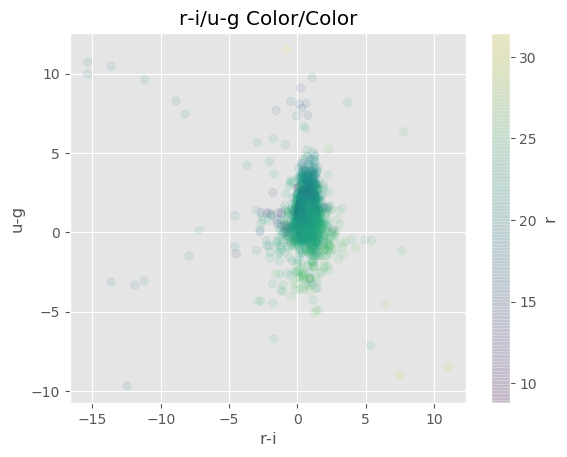

In [8]:
plt.scatter(data['r']-data['i'],data['u']-data['g'],  c=data['r'], alpha=.1)
cb = plt.colorbar()
cb.set_label('r')
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.xlabel('r-i')
plt.ylabel('u-g')
plt.title('r-i/u-g Color/Color');

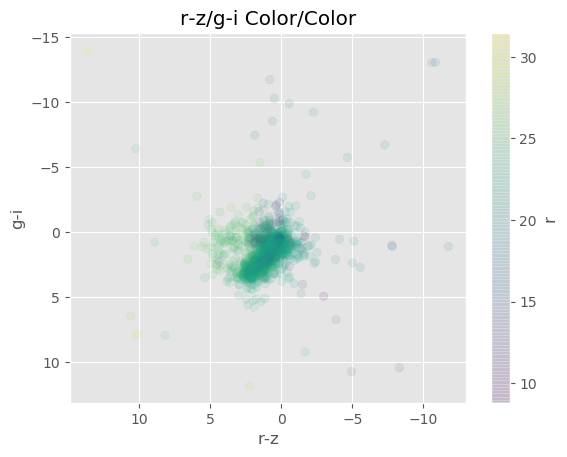

In [9]:
plt.scatter(data['r']-data['z'], data['g']-data['i'],  c=data['r'], alpha=.1)
cb = plt.colorbar()
cb.set_label('r')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('r-z')
plt.ylabel('g-i')
plt.title('r-z/g-i Color/Color');

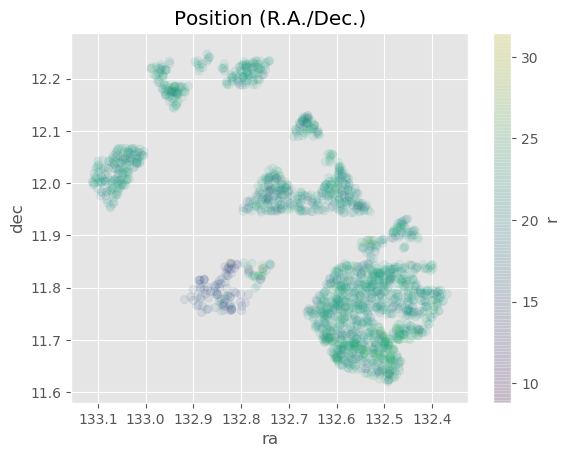

In [10]:
# damn I would not have guessed that plotting ra/dec would be so cool:

plt.scatter(data['ra'], data['dec'],  c=data['r'], alpha=.1)
cb = plt.colorbar()
cb.set_label('r')
plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.xlabel('ra')
plt.ylabel('dec')
plt.title('Position (R.A./Dec.)');

In [11]:
# Another thing I just noticed - the stars get bluer in the segment closest to the
# center of the cluster. Makes sense that it would, but still, neat!


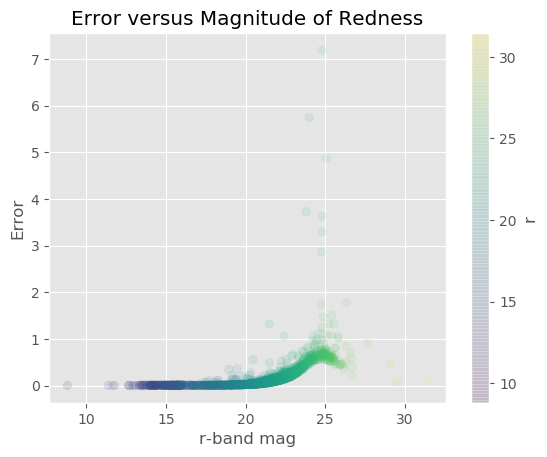

In [12]:
# also cool:

plt.scatter(data['r'],data['Err_r'],  c=data['r'], alpha=.1)
cb = plt.colorbar()
cb.set_label('r')
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.xlabel('r-band mag')
plt.ylabel('Error')
plt.title('Error versus Magnitude of Redness');

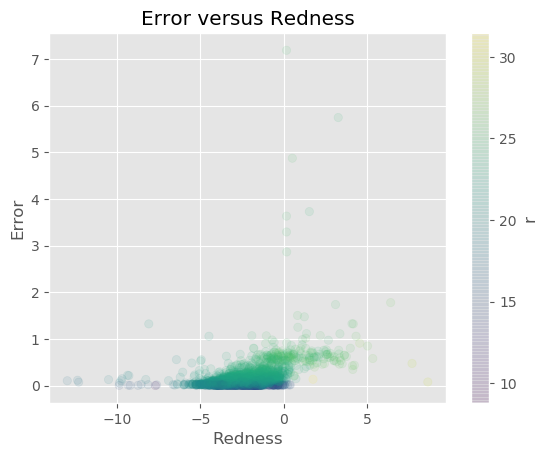

In [13]:
plt.scatter(data['r']-data['u'],data['Err_r'],  c=data['r'], alpha=.1)
cb = plt.colorbar()
cb.set_label('r')
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.xlabel('Redness')
plt.ylabel('Error')
plt.title('Error versus Redness');

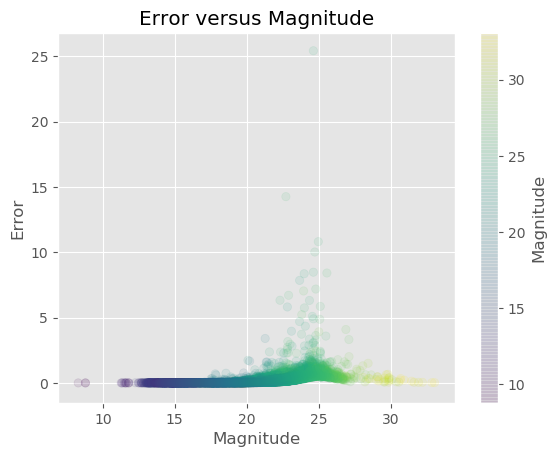

In [14]:
# hell, let's try that with all of them!

plt.scatter(data['r'],data['Err_r'], c=data['r'], alpha=.1)
plt.scatter(data['u'],data['Err_u'], c=data['u'], alpha=0.1)
plt.scatter(data['z'],data['Err_z'], c=data['z'], alpha=0.1)
plt.scatter(data['g'],data['Err_g'], c=data['g'], alpha=0.1)
plt.scatter(data['i'],data['Err_i'], c=data['i'], alpha=0.1)
cb = plt.colorbar()
cb.set_label('Magnitude')
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.xlabel('Magnitude')
plt.ylabel('Error')
plt.title('Error versus Magnitude');

# Now for a smaller section of the sky:

In [15]:
# This could be way more elegant if I was just willing to write a couple more for loops, but flux it.

tiny_u = []
tiny_g = []

for star in data:
    if 132.7 < star['ra'] < 133.0 and 11.7 < star['dec'] < 11.9:
        tiny_u.append(star['u'])
        tiny_g.append(star['g'])
        
print(tiny_u[0:5])
print(tiny_g[0:5])

[15.459637, 15.12579, 16.22553, 13.417107, 17.152203]
[14.886649, 13.821444, 14.855531, 13.843412, 15.5097065]


In [16]:
tiny_u = np.array(tiny_u)
tiny_g = np.array(tiny_g)

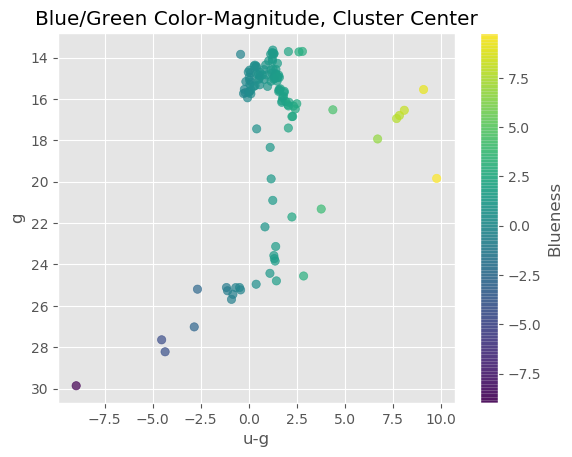

In [17]:
plt.scatter(tiny_u-tiny_g,tiny_g,  c=tiny_u-tiny_g, alpha=0.7)
cb = plt.colorbar()
cb.set_label('Blueness')
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('u-g')
plt.ylabel('g')
plt.title('Blue/Green Color-Magnitude, Cluster Center');

In [18]:
filterlist =['u', 'g', 'r', 'i', 'z']

In [19]:
# oh to hell with it, I'll just hardcode all this shit:

In [20]:
tinyr = []
tinyi = []
tinyz = []

for star in data:
    if 132.7 < star['ra'] < 133.0 and 11.7 < star['dec'] < 11.9:
        tinyr.append(star['r'])
        tinyi.append(star['i'])
        tinyz.append(star['z'])
        
print(tinyr[0:5])
print(tinyi[0:5])

[14.574878, 14.570683, 14.366154, 13.343218, 14.885241]
[14.43781, 14.185885, 14.199227, 13.3953705, 14.683102]


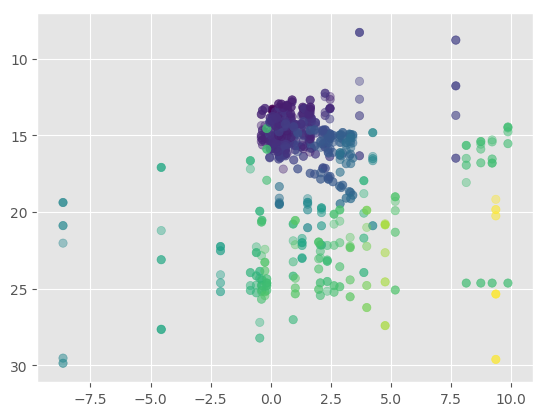

In [21]:
# for fun:

ax,fig = plt.subplots(1,1)

fig.invert_yaxis()
fig.scatter(tiny_u-tinyr, tiny_u, c=(tiny_u), alpha=0.7)
fig.scatter(tiny_u-tinyr, tiny_g, c=(tiny_u), alpha=0.6)
fig.scatter(tiny_u-tinyr, tinyr, c=(tiny_u), alpha=0.5)
fig.scatter(tiny_u-tinyr, tinyi, c=(tiny_u), alpha=0.4)
fig.scatter(tiny_u-tinyr, tinyz, c=(tiny_u), alpha=0.8);

In [22]:
# back to just a single magnitude now, it's easier for me to interpret the results there

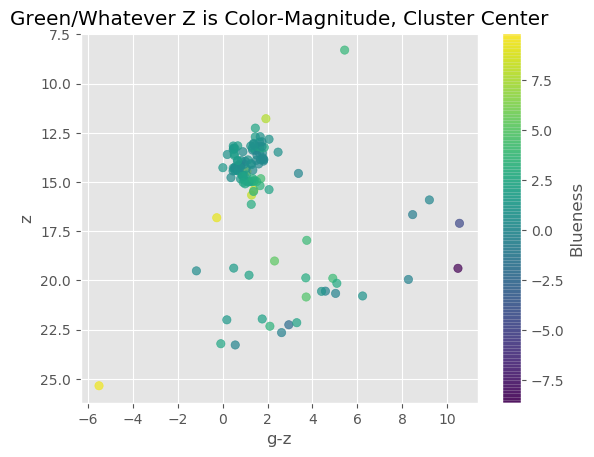

In [23]:
plt.scatter(tiny_g-tinyz,tinyz,  c=tiny_u-tinyr, alpha=0.7)
cb = plt.colorbar()
cb.set_label('Blueness')
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('g-z')
plt.ylabel('z')
plt.title('Green/Whatever Z is Color-Magnitude, Cluster Center');

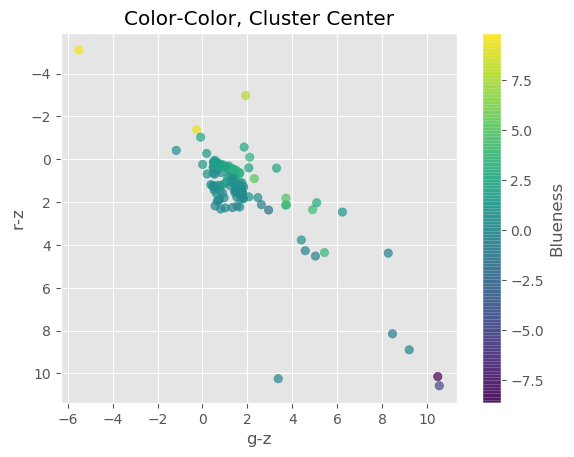

In [24]:
tinyr = np.array(tinyr)
tinyz = np.array(tinyz)

# I'm not sure why it won't make a color plot out of a list if it's on the y-axis. Oh well,
# whatever, I got it to plot at any rate.

plt.scatter(tiny_g-tinyz, tinyr-tinyz,  c=tiny_u-tinyr, alpha=0.7)
cb = plt.colorbar()
cb.set_label('Blueness')
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('g-z')
plt.ylabel('r-z')
plt.title('Color-Color, Cluster Center');

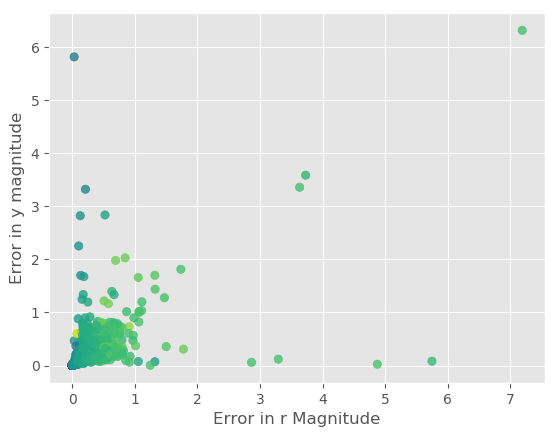

In [25]:
# Just out of curiosity. Also turned out to be interesting.

plt.scatter(data['Err_r'], data['Err_i'], c=data['r'], alpha=0.8)
plt.xlabel('Error in r Magnitude')
plt.ylabel('Error in y magnitude');

In [26]:
filepath2 = './fits/Skyserver_SQL5_16_2018 10_43_53 PM.fits'

In [27]:
hdu1 = fits.open(filepath2)

data1 = hdu1[1].data.copy()
header1 = hdu1[1].header.copy()

hdu1.close()
header1

XTENSION= 'BINTABLE'                                                            
BITPIX  =                    8                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  148                                                  
NAXIS2  =                 1087                                                  
PCOUNT  =                    0                                                  
GCOUNT  =                    1                                                  
TFIELDS =                   11                                                  
TFORM1  = '64A'                                                                 
TTYPE1  = 'apstar_id'                                                           
TFORM2  = '32A'                                                                 
TTYPE2  = 'apogee_id'                                                           
TFORM3  = '1D'              

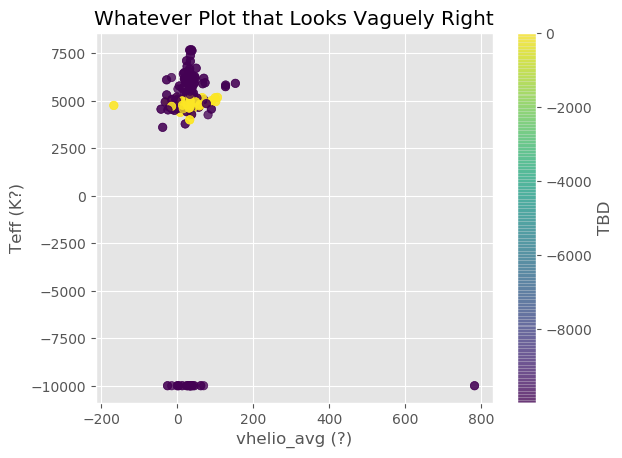

In [28]:
plt.scatter(data1['vhelio_avg'],data1['teff'],  c=data1['logg'], alpha=0.5)
cb = plt.colorbar()
cb.set_label('TBD')
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.xlabel('vhelio_avg (?)')
plt.ylabel('Teff (K?)')
plt.title('Whatever Plot that Looks Vaguely Right');

In [30]:
# The negative temperature ones make no sense. It isn't logarithmic.

# Checking IR data against visual:

In [40]:
# super lazy way of getting the arrays to be the same size:

filepath3 = './fits/Skyserver_SQL5_18_2018 10_29_47 PM.fits'

In [56]:
hdu2 = fits.open(filepath3)
nvis_data = hdu2[1].data.copy()
nvis_header = hdu2[1].header.copy()
hdu2.close()

In [58]:
nvis_data['ra'] = np.sort(nvis_data['ra'])
data1['ra'] = np.sort(data1['ra'])

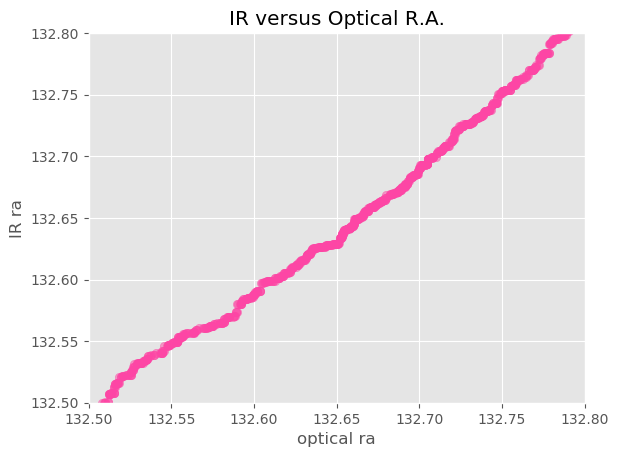

In [64]:
plt.scatter(nvis_data['ra'],data1['ra']-0.2, color='xkcd:Barbie Pink', alpha=0.5)
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.xlim(132.5,132.8)
plt.ylim(132.5,132.8)
plt.xlabel('optical ra')
plt.ylabel('IR ra')
plt.title('IR versus Optical R.A.');

# I have no idea why the IR is offset by 0.2, but whatever.

In [ ]:
# Annnnd oops no magnitudes in the Apogee IR data; good thing there wasn't time to make the plots anyway.